In [10]:
import numpy as np
from datascience import *
%matplotlib inline
np.set_printoptions(threshold=50)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# This table can be found online: https://www.statcrunch.com/app/index.php?dataid=1843341
nba = Table.read_table('nba_salaries.csv').relabeled(3, 'SALARY').drop(2)
nba

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625
Jeff Teague,PG,8
Kyle Korver,SG,5.74648
Thabo Sefolosha,SF,4
Mike Scott,PF,3.33333
Kent Bazemore,SF,2
Dennis Schroder,PG,1.7634
Tim Hardaway Jr.,SG,1.30452


## Create an array containing the names of all point guards (PG) who make more than $15M/year

In [5]:
nba.where(1,'PG').where(2,are.above(15)).column(0)


array(['Derrick Rose', 'Kyrie Irving', 'Chris Paul', 'Russell Westbrook',
       'John Wall'], dtype='<U24')

In [7]:
nba=nba.with_row(['Mahdi Zareei', 'Mascot', 100])
nba.where('POSITION', are.containing('Mascot'))

PLAYER,POSITION,SALARY
Mahdi Zareei,Mascot,100


## Population & Age


In [14]:
# As of Jan 2017, this census file is online here: 
#data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

# A copy can be accessed here in case census.gov moves the file:
data = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

full_census_table = Table.read_table(data)
full_census_table

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


Go back to slide 

In [15]:
partial = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015')
partial.show(2)

SEX,AGE,POPESTIMATE2010,POPESTIMATE2015
0,0,3951330,3978038
0,1,3957888,3968564


In [16]:
us_pop = partial.relabeled(2, '2010').relabeled(3, '2015')
us_pop.show(2)

SEX,AGE,2010,2015
0,0,3951330,3978038
0,1,3957888,3968564


In [17]:
us_pop.column('2015') - us_pop.column('2010')

array([  26708,   10676, -124279, ...,    7990,   16828, 5930703])

In [19]:
change = us_pop.column('2015') - us_pop.column('2010')
census = us_pop.with_columns(
    'Change', change,
    'Percent Change', change/us_pop.column('2010')
)
census

SEX,AGE,2010,2015,Change,Percent Change
0,0,3951330,3978038,26708,0.00675924
0,1,3957888,3968564,10676,0.0026974
0,2,4090862,3966583,-124279,-0.0303797
0,3,4111920,3974061,-137859,-0.0335267
0,4,4077551,4020035,-57516,-0.0141055
0,5,4064653,4018158,-46495,-0.0114389
0,6,4073013,4019207,-53806,-0.0132104
0,7,4043046,4148360,105314,0.0260482
0,8,4025604,4167887,142283,0.0353445
0,9,4125415,4133564,8149,0.00197532


In [20]:
census.set_format('Percent Change', PercentFormatter)

SEX,AGE,2010,2015,Change,Percent Change
0,0,3951330,3978038,26708,0.68%
0,1,3957888,3968564,10676,0.27%
0,2,4090862,3966583,-124279,-3.04%
0,3,4111920,3974061,-137859,-3.35%
0,4,4077551,4020035,-57516,-1.41%
0,5,4064653,4018158,-46495,-1.14%
0,6,4073013,4019207,-53806,-1.32%
0,7,4043046,4148360,105314,2.60%
0,8,4025604,4167887,142283,3.53%
0,9,4125415,4133564,8149,0.20%


In [21]:
census.sort('Change', descending=True)

SEX,AGE,2010,2015,Change,Percent Change
0,999,309346863,321418820,12071957,3.90%
1,999,152088043,158229297,6141254,4.04%
2,999,157258820,163189523,5930703,3.77%
0,68,2359816,3436357,1076541,45.62%
0,64,2706055,3536156,830101,30.68%
0,65,2678525,3450043,771518,28.80%
0,66,2621335,3344134,722799,27.57%
0,67,2693707,3304187,610480,22.66%
0,72,1883820,2469605,585785,31.10%
2,68,1254117,1812428,558311,44.52%


Discussion question: If I assume the US population grows exponentially, how would I find the growth rate each year?

Don't worry if you don't know the answer right away.

In [22]:
(321418820/309346863) ** (1/5) - 1

0.007685750230353783

Here's how to do it without copy-pasting numbers:

In [23]:
everyone = census.sort('Change', descending=True).row(0)
everyone

Row(SEX=0, AGE=999, 2010=309346863, 2015=321418820, Change=12071957, Percent Change=0.039024016222204264)

In [ ]:
type(everyone)

In [ ]:
(everyone.item(3)/everyone.item(2)) ** (1/5) - 1

## Population & Gender


Lots more 68-year-olds than there used to be:

Why?

In [24]:
census.sort('Change', descending=True)

SEX,AGE,2010,2015,Change,Percent Change
0,999,309346863,321418820,12071957,3.90%
1,999,152088043,158229297,6141254,4.04%
2,999,157258820,163189523,5930703,3.77%
0,68,2359816,3436357,1076541,45.62%
0,64,2706055,3536156,830101,30.68%
0,65,2678525,3450043,771518,28.80%
0,66,2621335,3344134,722799,27.57%
0,67,2693707,3304187,610480,22.66%
0,72,1883820,2469605,585785,31.10%
2,68,1254117,1812428,558311,44.52%


In [25]:
2010-68 # Bombing of Pearl Harbor was 12/7/1941, people stopped having babies

1942

In [26]:
2015-68 # Bombing of Nagasaki was 8/9/1945, soldiers came home

1947

In [29]:
us_pop.where('AGE', are.above(97)).show()

SEX,AGE,2010,2015
0,98,47037,61991
0,99,32178,43641
0,100,54410,76974
0,999,309346863,321418820
1,98,9505,14719
1,99,6104,9577
1,100,9352,15088
1,999,152088043,158229297
2,98,37532,47272
2,99,26074,34064


In [30]:
us_pop_2015 = us_pop.drop('2010')
all_ages = us_pop_2015.where('AGE', are.equal_to(999))
all_ages

SEX,AGE,2015
0,999,321418820
1,999,158229297
2,999,163189523


In [31]:
all_ages.column('2015').item(0)

321418820

In [32]:
all_ages.with_column(
    'Proportion', all_ages.column('2015')/all_ages.column('2015').item(0)
).set_format('Proportion', PercentFormatter)

SEX,AGE,2015,Proportion
0,999,321418820,100.00%
1,999,158229297,49.23%
2,999,163189523,50.77%


In [33]:
infants = us_pop_2015.where('AGE', are.equal_to(0))
infants

SEX,AGE,2015
0,0,3978038
1,0,2035134
2,0,1942904


In [34]:
infants.with_column(
    'Proportion', infants.column('2015')/infants.column('2015').item(0)
).set_format('Proportion', PercentFormatter)

SEX,AGE,2015,Proportion
0,0,3978038,100.00%
1,0,2035134,51.16%
2,0,1942904,48.84%


In [35]:
females_all_rows = us_pop_2015.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females

SEX,AGE,2015
2,0,1942904
2,1,1939269
2,2,1939979
2,3,1943417
2,4,1964111
2,5,1967310
2,6,1968544
2,7,2031242
2,8,2039062
2,9,2021886


In [36]:
males_all_rows = us_pop_2015.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males

SEX,AGE,2015
1,0,2035134
1,1,2029295
1,2,2026604
1,3,2030644
1,4,2055924
1,5,2050848
1,6,2050663
1,7,2117118
1,8,2128825
1,9,2111678


In [37]:
males.column('AGE')

array([  0,   1,   2, ...,  98,  99, 100])

In [38]:
females.column('AGE')

array([  0,   1,   2, ...,  98,  99, 100])

In [39]:
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    '2015 F:M RATIO', females.column('2015')/males.column('2015')
)
ratios

AGE,2015 F:M RATIO
0,0.954681
1,0.955637
2,0.957256
3,0.957045
4,0.955342
5,0.959267
6,0.959955
7,0.959437
8,0.957834
9,0.957478


In [41]:
ratios.where('AGE', are.above(20)).show()

AGE,2015 F:M RATIO
21,0.946191
22,0.942565
23,0.948314
24,0.959251
25,0.9645
26,0.966443
27,0.969201
28,0.970738
29,0.973001
30,0.979513


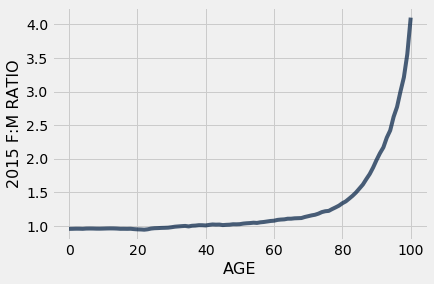

In [42]:
ratios.plot('AGE')

## Visualization

In [43]:
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


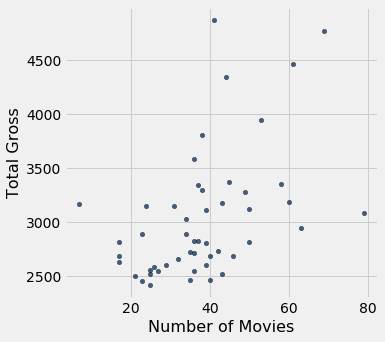

In [44]:
actors.scatter('Number of Movies', 'Total Gross')

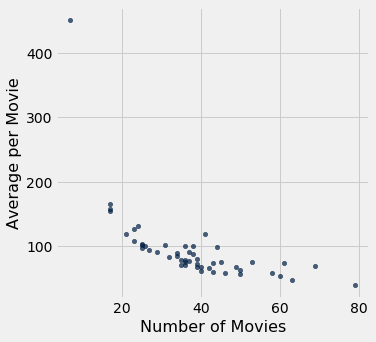

In [45]:
actors.scatter('Number of Movies', 'Average per Movie')

In [46]:
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


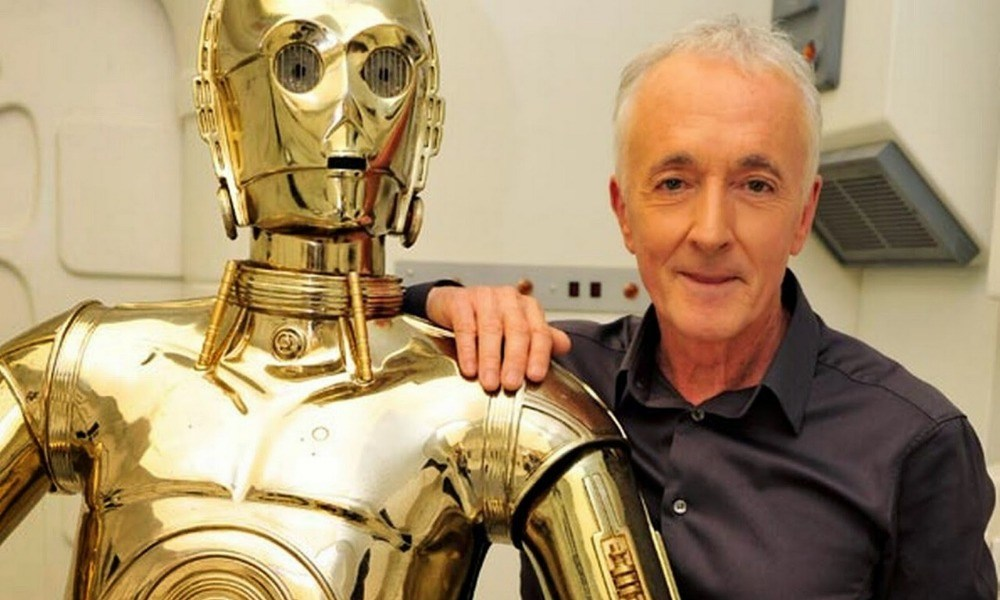

In [47]:
import IPython.display
IPython.display.Image('https://i1.wp.com/wipy.tv/wp-content/uploads/2019/11/este-comic-podria-ser-la-respuesta-para-mpiderman-del-mcu-19.jpg')

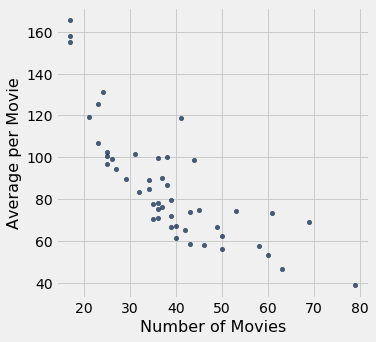

In [48]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

In [49]:
actors.where('Number of Movies', are.above(60))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


In [50]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')
movies

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2015,8.43,11128.5,702,Star Wars: The Force Awakens
2014,8.17,10360.8,702,American Sniper
2013,8.13,10923.6,688,Catching Fire
2012,7.96,10837.4,667,The Avengers
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,7.89,10565.6,536,Toy Story 3
2009,7.5,10595.5,521,Avatar
2008,7.18,9630.7,608,The Dark Knight
2007,6.88,9663.8,631,Spider-Man 3
2006,6.55,9209.5,608,Dead Man's Chest


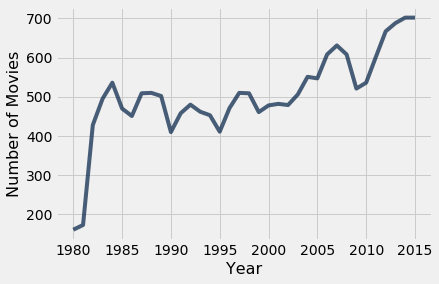

In [51]:
movies.plot('Year', 'Number of Movies')

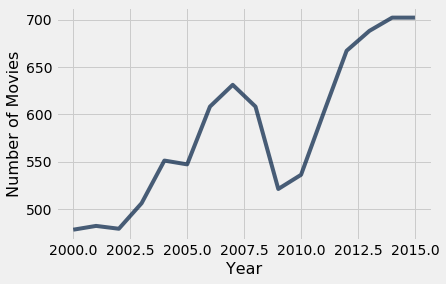

In [52]:
century_21 = movies.where('Year', are.above(1999))
century_21.plot('Year', 'Number of Movies')

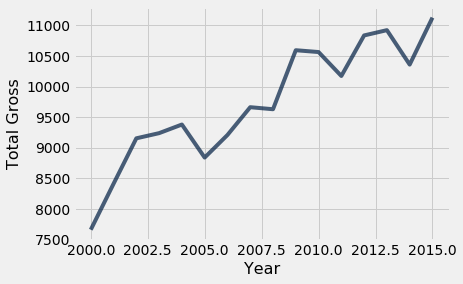

In [53]:
century_21.plot('Year', 'Total Gross')

In [54]:
century_21.where('Year', are.equal_to(2009))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2009,7.5,10595.5,521,Avatar


Back to slides 

## Categorical Distributions

In [55]:
top = Table.read_table('top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [57]:
top.sort('Gross (Adjusted)', descending= True)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


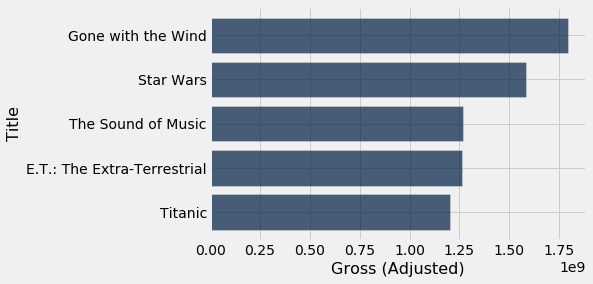

In [60]:
top5 = top.take(np.arange(5))
top5.barh('Title', 'Gross (Adjusted)')

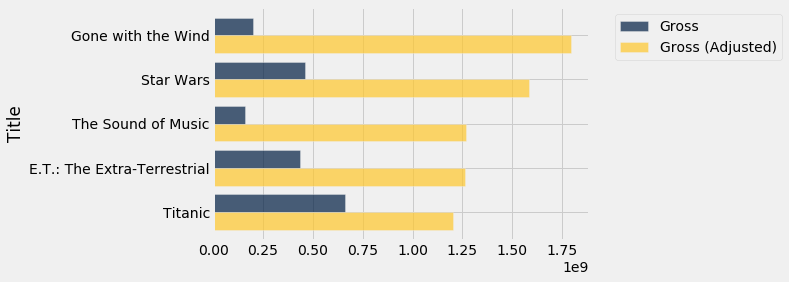

In [61]:
top5.select(0, 2, 3).barh('Title')

In [62]:
studios = top.group('Studio')
studios

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


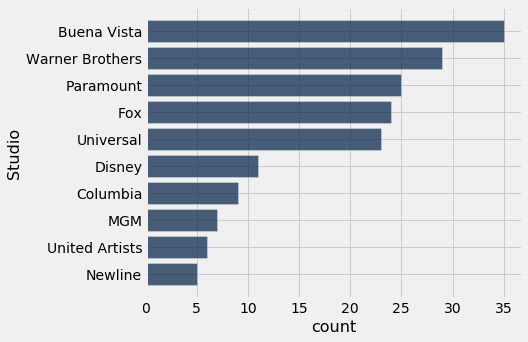

In [63]:
studios.sort('count', descending=True).take(np.arange(10)).barh('Studio')

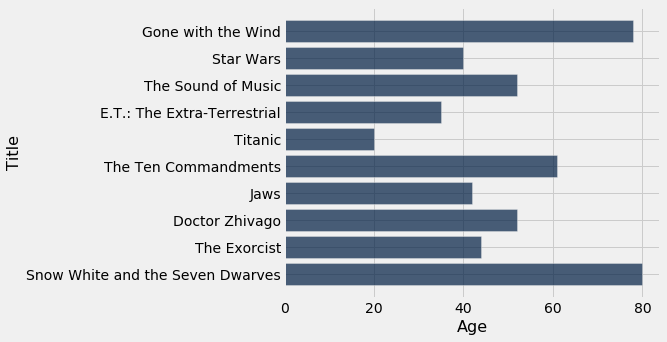

In [64]:
aged = top.with_column("Age", 2017-top.column('Year'))
aged.take(np.arange(10)).barh('Title', 'Age')

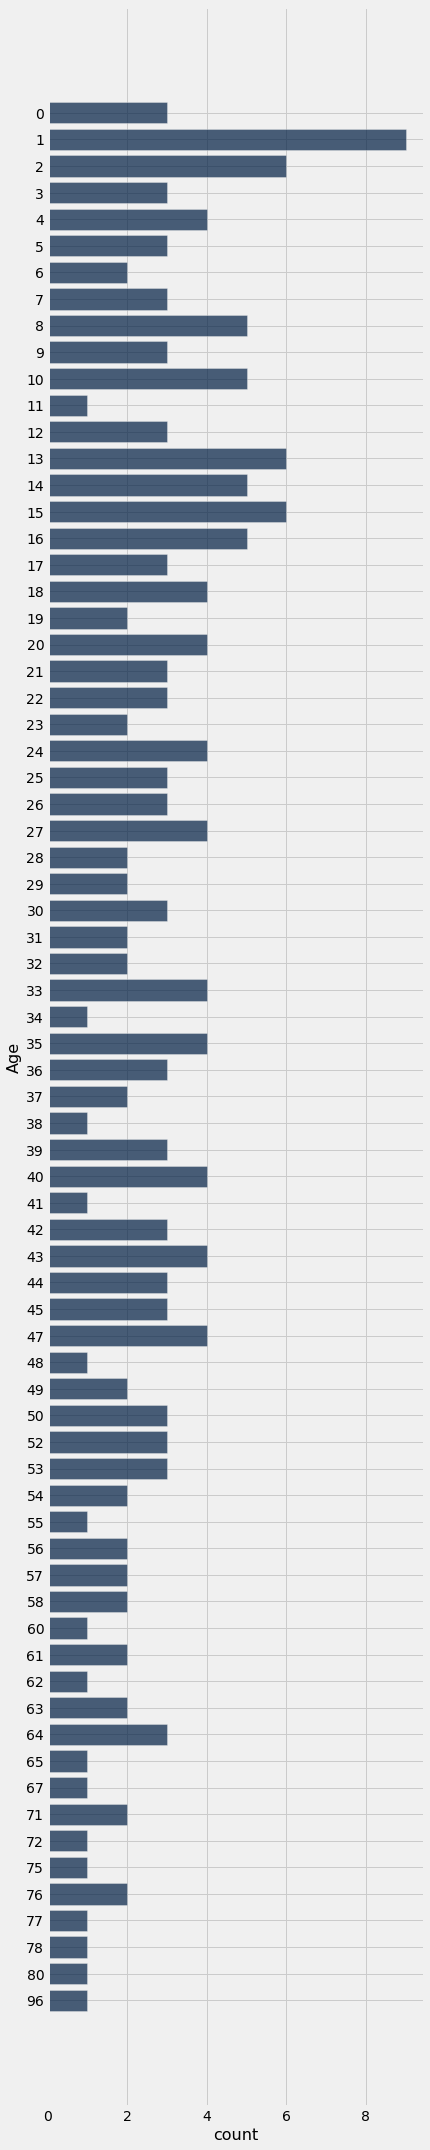

In [65]:
aged.group('Age').barh('Age', 'count')

## Histograms

In [66]:
aged.group('Age')

Age,count
0,3
1,9
2,6
3,3
4,4
5,3
6,2
7,3
8,5
9,3


In [68]:
aged.bin('Age').show()

bin,Age count
0,41
9.6,40
19.2,28
28.8,24
38.4,25
48,19
57.6,13
67.2,6
76.8,3
86.4,1


In [69]:
aged.bin('Age', bins=make_array(0, 20, 40, 60, 80, 100)) # Or use list as shortcut

bin,Age count
0,81
20,55
40,43
60,19
80,2
100,0


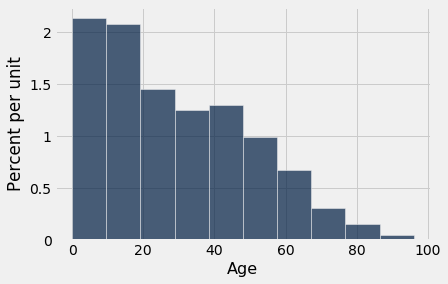

In [70]:
aged.hist('Age')

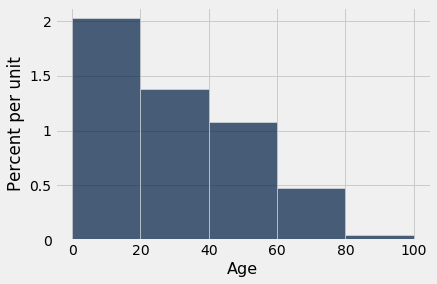

In [71]:
aged.hist('Age', bins=np.arange(0, 101, 20))

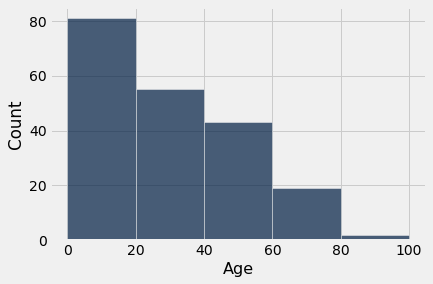

In [72]:
aged.hist('Age', bins=np.arange(0, 101, 20), normed=False)

## Density

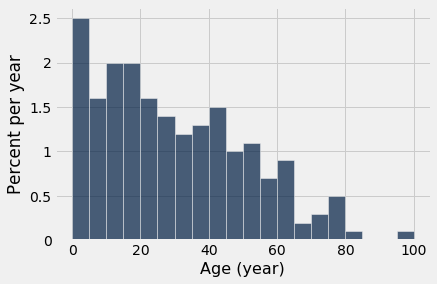

In [73]:
aged.hist('Age', bins=np.arange(0, 101, 5), unit='year')

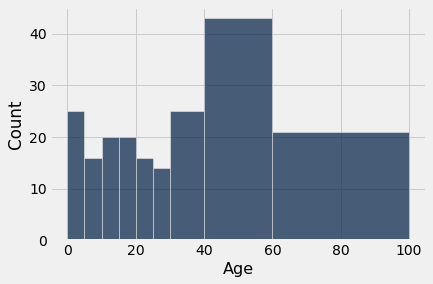

In [75]:
# aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], normed=False) 
aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 40, 60, 100], normed=False) 

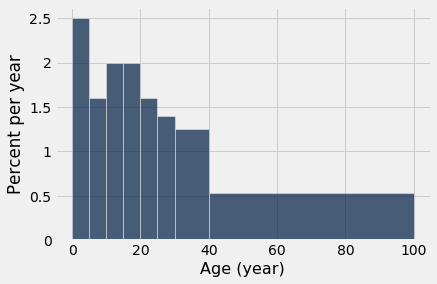

In [78]:
aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 40, 100], unit='year')

## Overlaid Graphs

In [79]:
heights = Table.read_table('galton_subset.csv')
heights = heights.select(2, 0, 1)
heights

son,father,mother
73.2,78.5,67
73.5,75.5,66.5
71,75,64
70.5,75,64
72,75,58.5
76.5,74,68
74,74,62
71,73,67
68,73,67
71,73,66.5


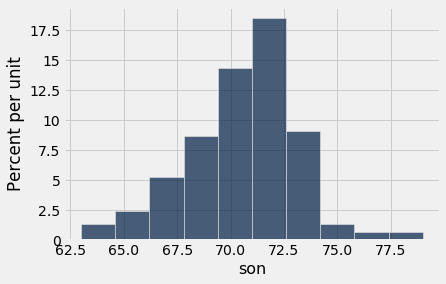

In [80]:
heights.hist('son')

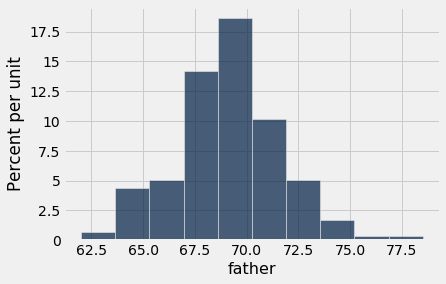

In [81]:
heights.hist('father')

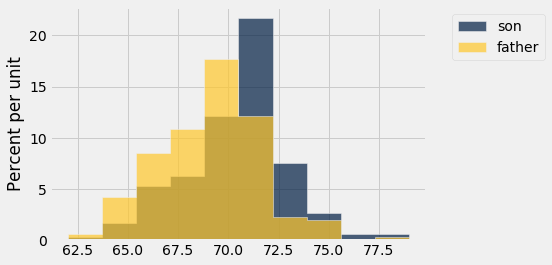

In [82]:
heights.hist('son', 'father')

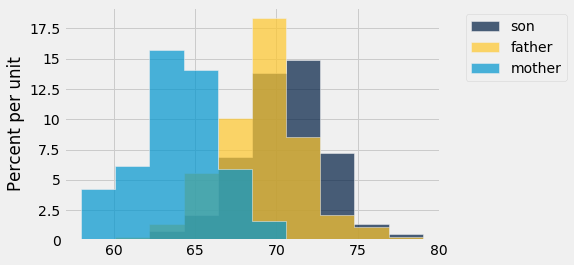

In [83]:
heights.hist('son', 'father', 'mother')

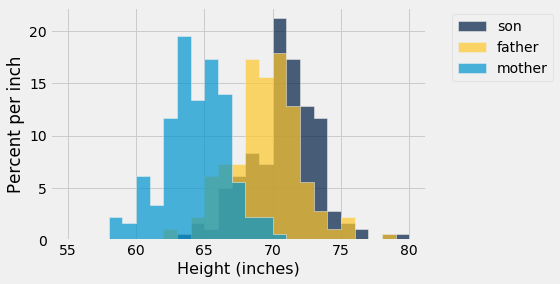

In [84]:
heights.hist(bins=np.arange(55, 81, 1), unit='inch')
_ = plt.xlabel('Height (inches)')

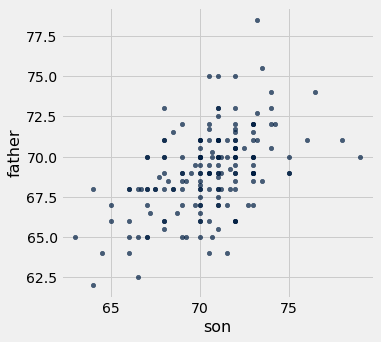

In [85]:
heights.scatter('son', 'father')

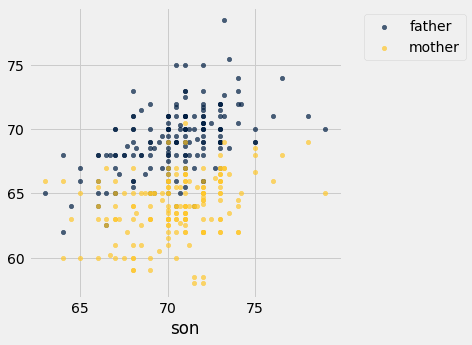

In [86]:
heights.scatter('son')